In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install tensorflow



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=c49ab621389f914ca99b72ffdd9e396570a602fe5561416d26cf01fe5ea029f9
  Stored in directory: c:\users\rannd\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [6]:
tf.__version__


'2.9.1'

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/rannd/Downloads/CNN Dataset/CNN Dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/rannd/Downloads/CNN Dataset/CNN Dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [15]:
cnn = tf.keras.models.Sequential()


In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))


In [17]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [19]:
cnn.add(tf.keras.layers.Flatten())


In [20]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


In [21]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [22]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [23]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)


Epoch 1/25
250/250 [==============================] - 127s 502ms/step - loss: 0.6644 - accuracy: 0.5918 - val_loss: 0.6091 - val_accuracy: 0.6790
Epoch 2/25
250/250 [==============================] - 59s 234ms/step - loss: 0.5964 - accuracy: 0.6744 - val_loss: 0.5391 - val_accuracy: 0.7305
Epoch 3/25
250/250 [==============================] - 58s 234ms/step - loss: 0.5508 - accuracy: 0.7169 - val_loss: 0.5212 - val_accuracy: 0.7455
Epoch 4/25
250/250 [==============================] - 58s 234ms/step - loss: 0.5159 - accuracy: 0.7454 - val_loss: 0.5771 - val_accuracy: 0.7015
Epoch 5/25
250/250 [==============================] - 60s 238ms/step - loss: 0.4972 - accuracy: 0.7515 - val_loss: 0.5124 - val_accuracy: 0.7590
Epoch 6/25
250/250 [==============================] - 61s 244ms/step - loss: 0.4769 - accuracy: 0.7726 - val_loss: 0.4951 - val_accuracy: 0.7640
Epoch 7/25
250/250 [==============================] - 60s 242ms/step - loss: 0.4687 - accuracy: 0.7739 - val_loss: 0.4633 - val_a

In [42]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:\\Users\\rannd\\Downloads\\CNN Dataset\\CNN Dataset\\single_prediction\\AS.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 32ms/step


In [43]:
print(prediction)


dog


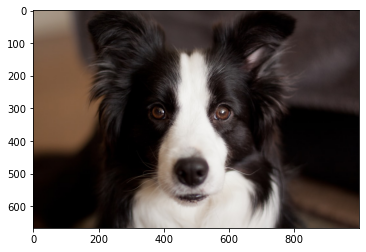

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()
    
image = imread("C:\\Users\\rannd\\Downloads\\CNN Dataset\\CNN Dataset\\single_prediction\\dog.jpg")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()

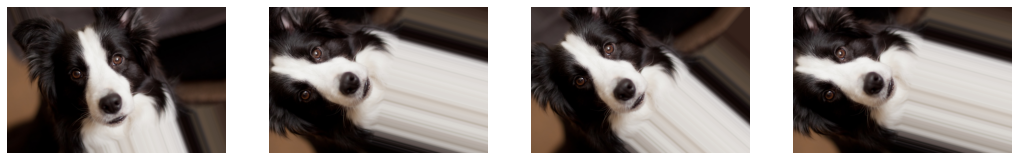

In [48]:
#Rotation
data_generator = ImageDataGenerator(rotation_range=90)
plot(data_generator)

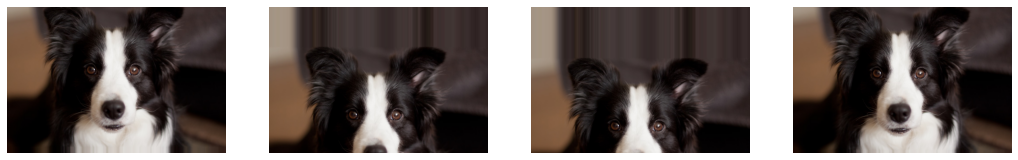

In [49]:
#Width Shifting
data_generator = ImageDataGenerator(width_shift_range=0.3)
plot(data_generator)

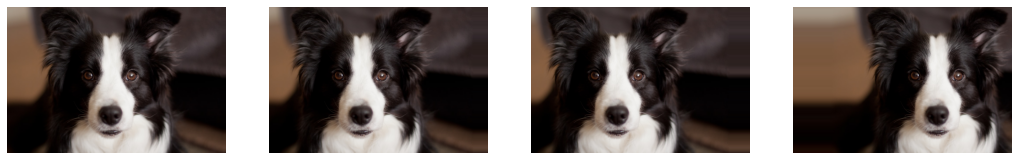

In [50]:
#Height Shifting
data_generator = ImageDataGenerator(height_shift_range=0.3)
plot(data_generator)

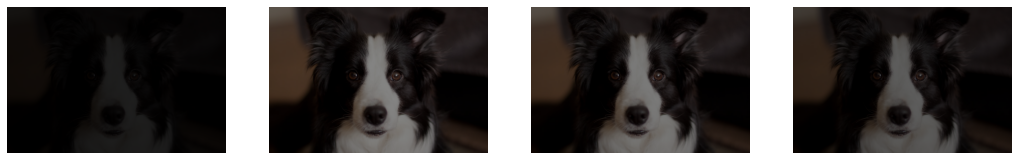

In [51]:
#Brightness
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
plot(data_generator)

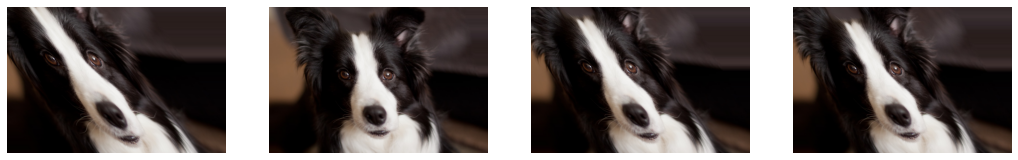

In [52]:
#Shear Intensity
data_generator = ImageDataGenerator(shear_range=45.0)
plot(data_generator)

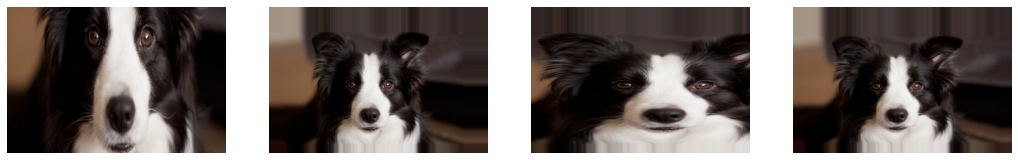

In [53]:
#Zoom
data_generator = ImageDataGenerator(zoom_range=[0.5, 1.5])
plot(data_generator)

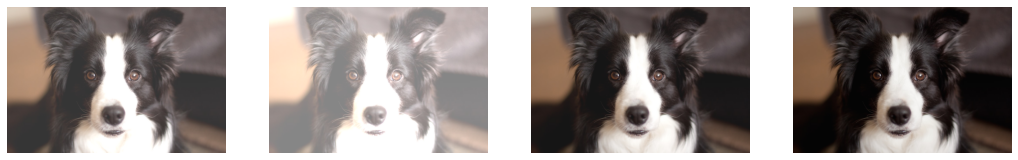

In [54]:
#Chanel Shift
data_generator = ImageDataGenerator(channel_shift_range=150.0)
plot(data_generator)

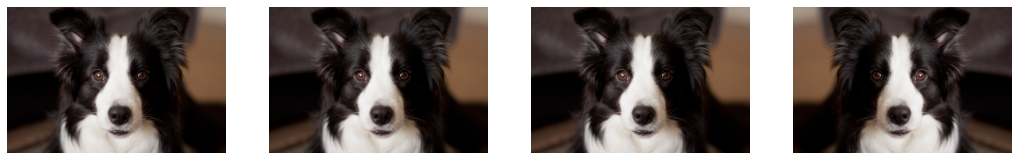

In [55]:
#Horizontal Flip
data_generator = ImageDataGenerator(horizontal_flip=True)
plot(data_generator)

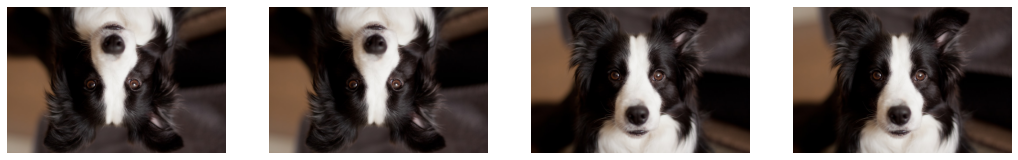

In [56]:
#Vertical Shift
data_generator = ImageDataGenerator(vertical_flip=True)
plot(data_generator)